In [1]:
import pandas as pd

from ase import Atoms
from ase.io import read,write

from ase.visualize import view

from os import listdir
from os.path import join

import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

2024-04-14 12:33:55.334899: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-14 12:33:55.336351: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-14 12:33:55.366653: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-14 12:33:56.158344: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [30]:

data_dir = "../data"
df = pd.read_pickle(join(data_dir,"transitions_df.p"))

In [31]:
df

,initial_state,final_state,initial_conf,final_conf,initial_file,final_file,initial_snap,final_snap,initial_ace,final_ace
0,2458,2514,"(Atom('Pt', [16.891824119192098, 10.1507631789...","(Atom('Pt', [16.853061085379768, 10.1137640799...",2458_2514_0.dat,2458_2514_1.dat,"[[38.980067245598626, 12.524795992874562, -4.1...","[[39.08466422574774, 12.483437545577399, -4.10...","[[2.3302507066286196, 0.25208935186782716, 0.8...","[[2.3313052197097996, 0.252370828078221, 0.899..."
1,2417,2418,"(Atom('Pt', [11.715215934019668, 16.3911847516...","(Atom('Pt', [11.821776976486966, 16.3676259690...",2417_2418_0.dat,2417_2418_1.dat,"[[46.760756562010904, 15.975774799918803, -3.8...","[[47.20155701198137, 16.350992986443188, -3.90...","[[2.5197053445066517, 0.29111010874710774, 1.0...","[[2.5307915327295794, 0.29411712742541973, 1.0..."
2,1023,1024,"(Atom('Pt', [19.207468506917255, 20.3295459034...","(Atom('Pt', [19.15307574312301, 20.30019765624...",1023_1024_0.dat,1023_1024_1.dat,"[[41.78251366329862, 13.700385940193998, -4.28...","[[41.81153443619754, 13.650345188163119, -4.24...","[[2.4031743803879357, 0.26685924262206495, 0.9...","[[2.4030630458983238, 0.2671784136234827, 0.94..."
3,868,869,"(Atom('Pt', [19.207468506917255, 20.3295459034...","(Atom('Pt', [19.15307574312301, 20.30019765624...",868_869_0.dat,868_869_0.dat,"[[41.78251366329862, 13.700385940193998, -4.28...","[[41.81153443619754, 13.650345188163119, -4.24...","[[2.4031743803879357, 0.26685924262206495, 0.9...","[[2.4030630458983238, 0.2671784136234827, 0.94..."
4,540,542,"(Atom('Pt', [19.207468506917255, 20.3295459034...","(Atom('Pt', [19.15307574312301, 20.30019765624...",540_542_0.dat,540_542_0.dat,"[[41.78251366329862, 13.700385940193998, -4.28...","[[41.81153443619754, 13.650345188163119, -4.24...","[[2.4031743803879357, 0.26685924262206495, 0.9...","[[2.4030630458983238, 0.2671784136234827, 0.94..."
...,...,...,...,...,...,...,...,...,...,...
6923,2115,2128,"(Atom('Pt', [19.713114789263727, 20.9530791355...","(Atom('Pt', [19.767766072487134, 20.8601510259...",2115_2128_0.dat,2115_2128_0.dat,"[[42.48294117934522, 13.944567881673017, -4.25...","[[43.35245246797469, 14.298260415866146, -4.22...","[[2.4201239111361352, 0.2701739877744439, 0.95...","[[2.44078848998059, 0.27477476660542566, 0.974..."
6924,2166,1689,"(Atom('Pt', [19.3945175019235, 20.233189112181...","(Atom('Pt', [19.463021736568283, 20.2095783358...",2166_1689_0.dat,2166_1689_1.dat,"[[39.749115935856345, 12.812633279887633, -4.2...","[[39.750614393954095, 12.916864726931403, -4.2...","[[2.350661902552126, 0.2567004346592921, 0.914...","[[2.3516073446679187, 0.25654891461369544, 0.9..."
6925,945,946,"(Atom('Pt', [19.3945175019235, 20.233189112181...","(Atom('Pt', [19.463021736568283, 20.2095783358...",945_946_0.dat,945_946_0.dat,"[[39.749115935856345, 12.812633279887633, -4.2...","[[39.750614393954095, 12.916864726931403, -4.2...","[[2.350661902552126, 0.2567004346592921, 0.914...","[[2.3516073446679187, 0.25654891461369544, 0.9..."
6926,1723,1735,"(Atom('Pt', [8.403605399621133, 15.66192933852...","(Atom('Pt', [8.255799203538341, 15.73714546328...",1723_1735_0.dat,1723_1735_1.dat,"[[45.06420653442604, 12.122911583991508, -4.49...","[[42.30651673625393, 13.20395301214107, -4.237...","[[2.4768765477286685, 0.2674660168092841, 0.95...","[[2.412518561584541, 0.26797884366754565, 0.95..."


In [76]:
ace_ini = np.stack(df.initial_ace)
ace_fin = np.stack(df.final_ace)

ace_disp = ace_fin - ace_ini

In [77]:
sna_ini = np.stack(df.initial_snap)
sna_fin = np.stack(df.final_snap)

sna_disp = sna_fin - sna_ini

In [78]:
np.sqrt(np.mean(ace_disp**2)) / np.sqrt(np.mean(ace_ini**2))

0.06791490357530375

In [79]:
np.sqrt(np.mean(sna_disp**2))/ np.sqrt(np.mean(sna_ini**2))

0.06492316321591704

In [44]:
coords_ini = np.stack([atoms.positions for atoms in df.initial_conf])
coords_fin = np.stack([atoms.positions for atoms in df.final_conf])
coords_disp = coords_fin - coords_ini

In [66]:
np.sqrt(np.mean(coords_disp**2)) / np.sqrt(np.mean(coords_ini**2))

0.009818446540663607

In [67]:
pca = PCA(n_components = 3)

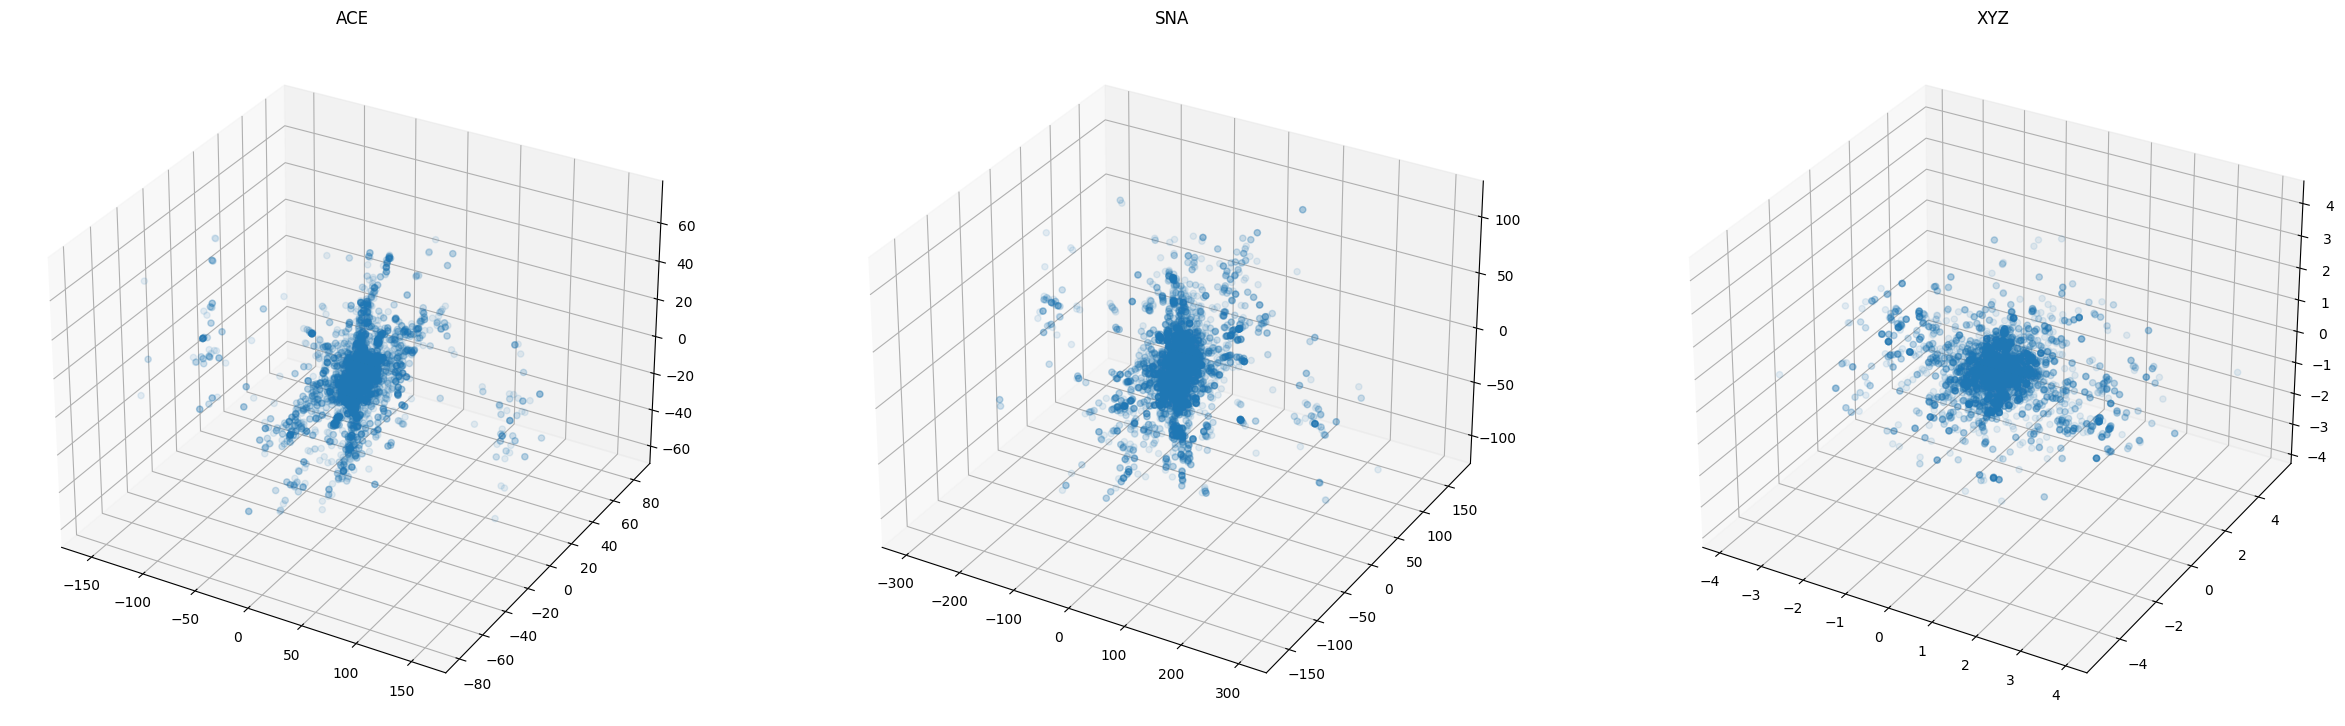

In [106]:
Ndata, Natom, Nlatent = aces_disp.shape

Xace = ace_disp.reshape(Ndata,Natom*Nlatent)
Xace = pca.fit_transform(Xaces)

Qace = np.cov(ace_disp.reshape(Ndata,Natom*Nlatent).T)

Ndata, Natom, Nlatent = sna_disp.shape

Xsna = sna_disp.reshape(Ndata,Natom*Nlatent)
Xsna = pca.fit_transform(Xsna)

Qsna = np.cov(sna_disp.reshape(Ndata,Natom*Nlatent).T)

Ndata, Natom, Nlatent = coords_disp.shape

Xcoords = coords_disp.reshape(Ndata,Natom*Nlatent)
Xcoords = pca.fit_transform(Xcoords)

Qcoords = np.cov(coords_disp.reshape(Ndata,Natom*Nlatent).T)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,subplot_kw ={'projection':'3d'})

fig.set_figwidth(30)
fig.set_figheight(10)
ax1.set(title="ACE")
ax2.set(title="SNA")
ax3.set(title="XYZ")

ax1.scatter(Xace[:,0],Xace[:,1],Xace[:,2],alpha=0.1)
ax2.scatter(Xsna[:,0],Xsna[:,1],Xsna[:,2],alpha=0.1)
ax3.scatter(Xcoords[:,0],Xcoords[:,1],Xcoords[:,2],alpha=0.1)
plt.show()

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)

fig.set_figwidth(30)
fig.set_figheight(10)
ax1.set(title="ACE")
ax2.set(title="SNA")
ax3.set(title="XYZ")

ax1.imshow(np.log(Qace**2))
ax2.imshow(np.log(Qsna**2))
ax3.imshow(np.log(Qcoords**2))
